# Time forecasting model for GHG emissions

The time forecasting of GHG emissions from pre-corona data will give us an estimate of what our current emissions would be without corona. The difference between this and our actual data will be our daily emissions savings. The following model is an SARIMA (Seasonal Auto Regressive Integrated Moving Average) following this article: https://towardsdatascience.com/time-series-in-python-part-2-dealing-with-seasonal-data-397a65b74051

## Import libraries

In [289]:
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Load data

In [290]:
file_name = 'uk_energy_daily.csv'
data_dir = 'data/processed'
file_path = os.path.join(data_dir, file_name)
load_df = pd.read_csv(file_path, usecols = ["demand", "timestamp"])
load_df["timestamp"] = pd.to_datetime(load_df["timestamp"])
load_df.set_index(["timestamp"], inplace=True)
load_df = load_df.groupby(pd.Grouper(freq='W')).mean()

In [291]:
load_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 474 entries, 2011-05-29 to 2020-06-21
Freq: W-SUN
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  474 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [292]:
load_df.head()

,demand
timestamp,
2011-05-29,31179.960783
2011-06-05,32792.248598
2011-06-12,33820.311689
2011-06-19,33482.346304
2011-06-26,33668.414294


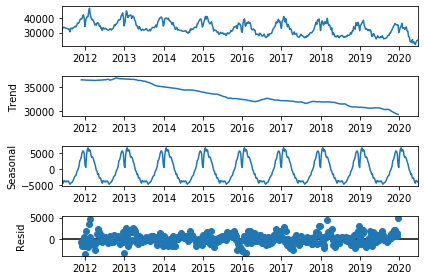

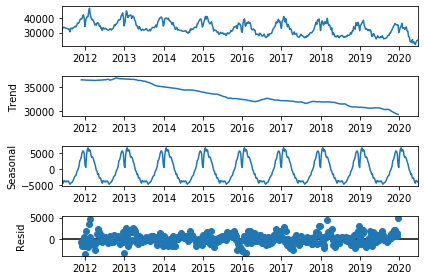

In [293]:
decomposition = seasonal_decompose(load_df)
decomposition.plot()

## Transform data to be stationary

Define stationary test function

In [294]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling('365D').mean()
    rolling_std = timeseries.rolling('365D').std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Dickey–Fuller test
    result = adfuller(timeseries)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

    # KPSS test
    result = kpss(timeseries, 'ct')
    print("KPSS statistic = {:.3f}".format(result[0]))
    print("p-value = {:.3f}".format(result[1]))
    print("Critical values :")
    for k, v in result[3].items():
        print("\t{}: {:.3f}".format(k, v))

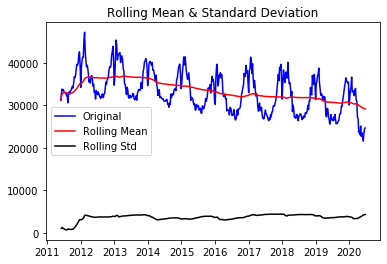

ADF Statistic: -5.176
p-value: 0.000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
KPSS statistic = 0.020
p-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [295]:
get_stationarity(load_df)

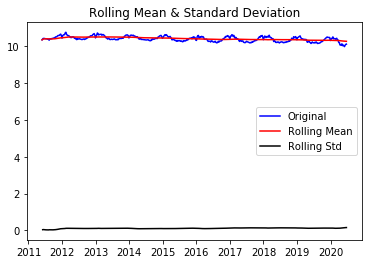

ADF Statistic: -4.802
p-value: 0.000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
KPSS statistic = 0.020
p-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [296]:
df_log = np.log(load_df)
get_stationarity(df_log)

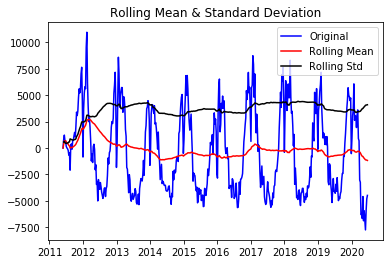

ADF Statistic: -8.435
p-value: 0.000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
KPSS statistic = 0.028
p-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [297]:
rolling_mean = load_df.rolling('365D').mean()
test_df_minus_mean = load_df - rolling_mean
test_df_minus_mean.dropna(inplace=True)
get_stationarity(test_df_minus_mean)

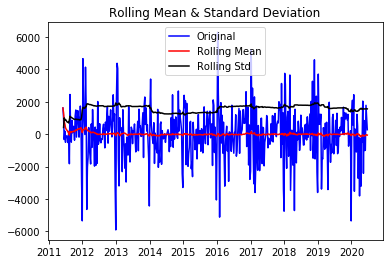

ADF Statistic: -6.477
p-value: 0.000
Critical Values:
	1%: -3.444
	5%: -2.868
	10%: -2.570
KPSS statistic = 0.018
p-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [298]:
load_df_shift = load_df - load_df.shift()
load_df_shift.dropna(inplace=True)
get_stationarity(test_df_shift)

In [299]:
train = load_df.iloc[:-104]
test = load_df.iloc[-104:]

## Holt-Winter’s Seasonal Smoothing model

C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\rober\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


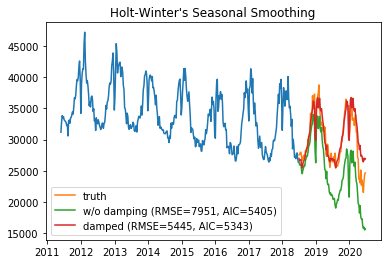

In [300]:
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=52, damped=True)
fit = model.fit()
pred = fit.forecast(104)
fit2 = model2.fit()
pred2 = fit2.forecast(104)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots()
ax.plot(train.index, train.values);
ax.plot(test.index, test.values, label='truth');
ax.plot(test.index, pred, label="w/o damping (RMSE={:0.0f}, AIC={:0.0f})".format(sse1, fit.aic));
ax.plot(test.index, pred2, label="damped (RMSE={:0.0f}, AIC={:0.0f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

The version with damping works well. Good alignment up until 2020 when the 'truth' is lower than predicted